# Training and Testing Datasets
Author: Ravin Poudel

Our goal in statistics or machine learning is to build a model.  Often we start with a set of data, fit a model of choice to the data, publish the model.  However, it is equally important to test the model with new data and check/evaluate the model performance. Model validation requires a new set of data; the data that has not been used in fitting a model or the model has never seen these data.  From an agricultural perspective, it means an additional experiment to generate data for model validation. Instead, we can __randomly__ divide a single dataset into two sets.  Then use one set for training the model and other sets for testing/evaluating the learned model.

<img src="../nb-images/Train_test.png">

> Train data set: A data set used to __construct/train/learn__ a model. 

> Test data set: A data set used to __evaluate__ the model.



#### How do we spilit a single dataset into two?

There is not a single or one best solution. Conventionally more data is used for model training than for model testing. Often convention such as `75%/ 25% train/ test or 90%/10% train/test` scheme are used. Regardless of how we decide to split the dataset, there are some pros and some cons. For instance,  a larger training dataset allows us to learn the model better, while the larger testing dataset increases confidence in the model evaluation. _(Don't forget to evaluate sd in model accuracy among various approaches discussed in the sections below)_.

Before we split the data, we also need to keep in mind the following question.

> Can we apply similar data-splitting scheme when we have a small dataset? Often the case in agriculture or life sciences - "as of now."

> Does a single random split make our predictive model random? Do we want a stable model or a random model?


Now, let's start working on python. Here using `iris dataset`, we will explore the data splitting scheme, then build and evaluate the model. We will also explore various cross-validation methods briefly. The main goal of this module is to provide a general overview of creating train and test dataset, apply them to build a model, and evaluate the model performance. Beyond this model, you will be using this concept of train/test data throughout the other advanced modules in the workshop or the rest of your research.

The `iris dataset` contains:

- 50 samples of 3 different species of iris flower (150 samples in total)
- Iris flower: Setosa, Versicolour, and Virginica
- Measurements: sepal length, sepal width, petal length, petal width


In [2]:
# import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [3]:
# import iris data from scikit and data preparation

iris = datasets.load_iris() # inbuilt data 
iris_X = iris['data'] # features data
iris_y = iris['target'] # this has information about the flower type, has been coded as 0, 1, or 2.
names = iris['target_names'] # flower type
feature_names = iris['feature_names'] # features name


In [4]:
# check data shape

iris_X.data.shape


(150, 4)

In [5]:
print(iris_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(names)

['setosa' 'versicolor' 'virginica']


In [7]:
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# splitting into train and test data. For example, test dataset = 20% of the original dataset

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.25, random_state=0)

In [9]:
# shape of train dataset

X_train.shape, y_train.shape

((112, 4), (112,))

In [10]:
# shape of test dataset

X_test.shape, y_test.shape

((38, 4), (38,))

In [11]:
# instantiate a K-Nearest Neighbors(KNN) model, and fit with X and y

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model_tt = model.fit(X_train, y_train)

NOTE: Here we are using KNeighborsClassifier model. Any other model, approprite to your study can be deployed. If you are interested to learn more on models, please follow [scikit-learn](https://scikit-learn.org/stable/)

In [12]:
# check the accuracy on the training set
model_tt.score(X_train, y_train)

0.9732142857142857

In [13]:
# predict class labels for the test set
predicted = model_tt.predict(X_test)
print (predicted)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [14]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


> Did you see any differences is the predicted and test output?

Text(0, 0.5, 'Predicted Values')

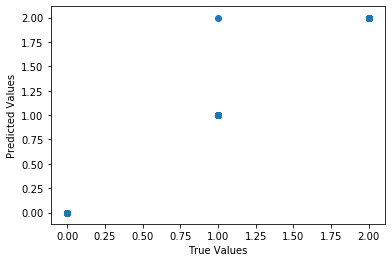

In [15]:
# scatter plot
plt.scatter(y_test, predicted)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

> Note: There are overlapping of predicted values and true values in the scatter plot. There are more than four points; more precisely there are 38 points.

In [16]:
# generate evaluation metrics
from sklearn import metrics
print (metrics.accuracy_score(y_test, predicted))

0.9736842105263158


## Confusion Matrix
Also known as an error matrix. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

In [17]:
print (metrics.confusion_matrix(y_test, predicted))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


<img src="../nb-images/cmatrix.png" width="400">

## NOTE:

> Never train model on your test dataset.

> Be suspesious: If you ever happen to have 100% accuracy in your model __(overf-fitting)__ with test data, be suspecious and double check if you have not used test dataset for traning your model. 

> __over-fitting:__ model performs very well on the training data but poorly on the test data. Model follows exactly the same trend as the training dataset. 


### Model Evaluation via Cross-Validation

Results of train and test split are based on a single random split. Given we are randomly splitting datasets, each time we ran the model, we might get a slightly different results. To minimize stochasticity in the model, rather we can use cross-validation approaches which are robust to these issues. Besides, these approaches are much suitable, especially when you have a smaller dataset. There are many [methods](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) of cross-validation available in scikit-learn, but just to get started we will be learning:

- K-Folds Cross-Validation

- Leave One Out Cros-Validation (LOOCV)


### K-Folds Cross-Validation
In K-Folds Cross-Validation, first, we divide the dataset randomly into k subset/bins. One of the subset/bin is used to validate the model, whereas the rest of the bins are used for training the model. We repeat the process for multiple rounds. Model performances at each round are averaged to define the overall performance of the model.

<img src="../nb-images/CV.png">

In [18]:
from sklearn import model_selection
model = KNeighborsClassifier()
kfold = model_selection.KFold(n_splits=5, random_state=12323, shuffle=True) # note shuffle is true so that samples are randomly assigned to the folds.

In [19]:
results = model_selection.cross_val_score(model, iris_X, iris_y, cv=kfold)
results

array([0.93333333, 0.96666667, 0.96666667, 1.        , 0.96666667])

In [20]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 96.667% (2.108%)


### Leave One Out Cross Validation (LOOCV)

In LOOCV, first, we randomly select one data point for testing and use the remaining data points for building a model. Given the smaller size of the test data, sd% is higher for model accuracy.

<img src="../nb-images/LOOV.png">

In [21]:
model = KNeighborsClassifier()
loocv = model_selection.LeaveOneOut()
results = model_selection.cross_val_score(model, iris_X, iris_y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 96.667% (17.951%)


### Comparision of model accuracy among various approches:

|Methods|Accuracy%|Sd%|Notes|
| :---: | :---: | :---: |:---:|
| Train/Test (75/25)|97.36|NA| |
| K-Folds (5)|96.67|2.20||
| LOOCV|96.67|17.95|Higher sd|

 ### !!! Now your turn :)

# Exercises

- How does train/test split ratio affects the model performance ? 
        - Try by changing the percentage of test data to 50% and evaluate the model.
        
- Evalate the model performance by incleasing K-folds size. 
        - Check the model accuracy and sd.
